In [10]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [11]:
#Use the URL for the raw CSV data
url = 'https://raw.githubusercontent.com/Dhanush-adk/machine_learning/main/project/data_preprocessed.csv'
df = pd.read_csv(url)

# Display the first 5 rows of the DataFrame
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day,hour,weekday,month,year,distance
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,7,19,3,5,2015,1.683323
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,17,20,4,7,2009,2.457590
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,24,21,0,8,2009,5.036377
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,26,8,4,6,2009,1.661683
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,28,17,3,8,2014,4.475450


In [12]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

In [24]:
X = df.drop('fare_amount', axis = 1)
y = df[['fare_amount']]

In [25]:
from sklearn.preprocessing import MinMaxScaler

In [26]:
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

In [27]:
X = pd.DataFrame(scaler_x.fit_transform(X), columns=X.columns, index=X.index).values
y = pd.DataFrame(scaler_y.fit_transform(y), columns=y.columns, index=y.index).values

In [29]:
train_X, val_X, train_Y, val_Y = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = torch.tensor(train_X)
y_train =  torch.tensor(train_Y)
X_val =  torch.tensor(val_X)
y_val =  torch.tensor(val_Y)

In [30]:
training_data = TensorDataset(X_train, y_train)
train_loader = DataLoader(training_data, batch_size=32, shuffle=True)

val_data = TensorDataset(X_val, y_val)
val_loader = DataLoader(val_data, batch_size=32)

In [31]:
def model_train(model, criterion, optimizer, epochs, train_loader, X_val, y_val):
    loss_train = []
    loss_val = []
    for epoch in range(epochs + 1):
        # Training
        model.train()
        for inputs, targets in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets.view(-1,1))
            loss.backward()
            optimizer.step()
        # Validation
        model.eval()
        with torch.no_grad():
            val_outputs = model(X_val)
            val_loss = criterion(val_outputs, y_val)
            if epoch % 50 == 0:
              print(f'Epoch {epoch}/{epochs}, Training Loss: {loss.item()}, Validation Loss: {val_loss.item()}')
            loss_val.append(val_loss)
            loss_train.append(loss)
    return loss_train, loss_val

In [32]:
model1 = nn.Sequential(
    nn.Linear(X_train.shape[1], 32),
    nn.Tanh(),
    nn.Linear(32, 1)
).to(torch.float64)
optimizer1 = optim.SGD(model1.parameters(), lr=0.01)


In [34]:
import time

start_time = time.time()
train_loss, val_loss = model_train(model1, nn.MSELoss(), optimizer1, 1000, train_loader, X_val, y_val)
end_time = time.time()
training_time = end_time - start_time
print(f"Training Time: {training_time} seconds")

Epoch 0/1000, Training Loss: 5.9661358380521694e-05, Validation Loss: 0.00015459380864179403
Epoch 50/1000, Training Loss: 6.233348764914806e-05, Validation Loss: 0.0001541710651531631
Epoch 100/1000, Training Loss: 4.596768291374782e-05, Validation Loss: 0.0001543408552982676
Epoch 150/1000, Training Loss: 0.0003102000181479714, Validation Loss: 0.00015441194221394193
Epoch 200/1000, Training Loss: 3.206526735146583e-05, Validation Loss: 0.00015324205765908738
Epoch 250/1000, Training Loss: 0.00018014126714096013, Validation Loss: 0.0001528373211505636
Epoch 300/1000, Training Loss: 4.333596113835117e-05, Validation Loss: 0.0001525138064958024
Epoch 350/1000, Training Loss: 2.747353963860329e-05, Validation Loss: 0.0001521130008712902
Epoch 400/1000, Training Loss: 2.5380600025640892e-05, Validation Loss: 0.00015190480821685037
Epoch 450/1000, Training Loss: 2.6482739318255635e-05, Validation Loss: 0.0001520346233041507
Epoch 500/1000, Training Loss: 2.5748684457733897e-05, Validation

In [35]:
torch.save(model1, 'model1.pth')

In [36]:
import pickle

# Save list to a file
with open('train_loss1.pkl', 'wb') as file:
    pickle.dump(train_loss, file)
with open('val_loss1.pkl', 'wb') as file:
    pickle.dump(val_loss, file)


In [37]:
model2 =  nn.Sequential(
    nn.Linear(X_train.shape[1], 32),
    nn.Tanh(),
    nn.Linear(32, 64),  # Second hidden layer with 64 neurons
    nn.Tanh(),
    nn.Linear(64, 16),  # Third hidden layer with 16 neurons
    nn.Tanh(),
    nn.Linear(16, 1) # Output layer with 1 neuron
).to(torch.float64)
criterion = nn.MSELoss()
optimizer1 = optim.SGD(model2.parameters(), lr=0.01)

In [38]:

import time

start_time = time.time()
train_loss2, val_loss2 = model_train(model2, nn.MSELoss(), optimizer1, 1000, train_loader, X_val, y_val)
end_time = time.time()
training_time = end_time - start_time
print(f"Training Time: {training_time} seconds")


Epoch 0/1000, Training Loss: 6.843239125973793e-05, Validation Loss: 0.00022764579403914428
Epoch 50/1000, Training Loss: 0.005958582697228134, Validation Loss: 0.00022077929988517178
Epoch 100/1000, Training Loss: 2.9965542653626924e-05, Validation Loss: 0.00014572898028660856
Epoch 150/1000, Training Loss: 2.0791336057972975e-05, Validation Loss: 0.00014035209662042637
Epoch 200/1000, Training Loss: 2.902645707053212e-05, Validation Loss: 0.00013866353724894254
Epoch 250/1000, Training Loss: 0.00024315962714454466, Validation Loss: 0.00014188710170682473
Epoch 300/1000, Training Loss: 2.4669059157896352e-05, Validation Loss: 0.00013754930356218623
Epoch 350/1000, Training Loss: 2.7087948643864502e-05, Validation Loss: 0.0001401711852001681
Epoch 400/1000, Training Loss: 1.4911324849866972e-05, Validation Loss: 0.0001370326273855936
Epoch 450/1000, Training Loss: 1.879837086952631e-05, Validation Loss: 0.00013725313838598209
Epoch 500/1000, Training Loss: 3.843759139832828e-05, Valida

In [39]:
torch.save(model2, 'model2.pth')

In [40]:
import pickle

# Save list to a file
with open('train_loss2.pkl', 'wb') as file:
    pickle.dump(train_loss2, file)
with open('val_loss2.pkl', 'wb') as file:
    pickle.dump(val_loss2, file)


#For more iterations

In [41]:
model1 = nn.Sequential(
    nn.Linear(X_train.shape[1], 32),
    nn.Tanh(),
    nn.Linear(32, 1)
).to(torch.float64)
optimizer1 = optim.SGD(model1.parameters(), lr=0.01)

In [42]:
import time

start_time = time.time()
train_loss_3000, val_loss_3000 = model_train(model1, nn.MSELoss(), optimizer1, 3000, train_loader, X_val, y_val)
end_time = time.time()
training_time = end_time - start_time
print(f"Training Time: {training_time} seconds")

Epoch 0/3000, Training Loss: 0.0005010977666786617, Validation Loss: 0.0003427195351851215
Epoch 50/3000, Training Loss: 2.9452807770724565e-05, Validation Loss: 0.00016045881195886553
Epoch 100/3000, Training Loss: 1.2598385043474273e-05, Validation Loss: 0.00015809816641553908
Epoch 150/3000, Training Loss: 2.8288454861302467e-05, Validation Loss: 0.00015692262163792713
Epoch 200/3000, Training Loss: 3.108443919892571e-05, Validation Loss: 0.0001560837211030549
Epoch 250/3000, Training Loss: 8.342218251981957e-05, Validation Loss: 0.00015539638752228323
Epoch 300/3000, Training Loss: 0.00032544650032445836, Validation Loss: 0.00015480705851685905
Epoch 350/3000, Training Loss: 0.0002327060515994678, Validation Loss: 0.00015446814990509116
Epoch 400/3000, Training Loss: 1.871891406459076e-05, Validation Loss: 0.00015394763764738493
Epoch 450/3000, Training Loss: 1.558071405921173e-05, Validation Loss: 0.00015335120636444967
Epoch 500/3000, Training Loss: 0.00041551552910179047, Valida

In [43]:
torch.save(model1, 'model1_3000.pth')

In [44]:
import pickle

# Save list to a file
with open('train_loss1_3000.pkl', 'wb') as file:
    pickle.dump(train_loss_3000 , file)
with open('val_loss1_3000.pkl', 'wb') as file:
    pickle.dump(val_loss_3000, file)


In [45]:
model2 =  nn.Sequential(
    nn.Linear(X_train.shape[1], 32),
    nn.Tanh(),
    nn.Linear(32, 64),  # Second hidden layer with 64 neurons
    nn.Tanh(),
    nn.Linear(64, 16),  # Third hidden layer with 16 neurons
    nn.Tanh(),
    nn.Linear(16, 1) # Output layer with 1 neuron
).to(torch.float64)
criterion = nn.MSELoss()
optimizer1 = optim.SGD(model2.parameters(), lr=0.1)

In [46]:
import time

start_time = time.time()
train_loss_2_3000, val_loss_2_3000 = model_train(model2, nn.MSELoss(), optimizer1, 3000, train_loader, X_val, y_val)
end_time = time.time()
training_time = end_time - start_time
print(f"Training Time: {training_time} seconds")

Epoch 0/3000, Training Loss: 7.647551501018402e-05, Validation Loss: 0.0003049115859010315
Epoch 50/3000, Training Loss: 8.128927060378039e-05, Validation Loss: 0.00015213193264450601
Epoch 100/3000, Training Loss: 0.00011005738458498954, Validation Loss: 0.00015245677686601426
Epoch 150/3000, Training Loss: 7.954926391730664e-05, Validation Loss: 0.0001451562475762302
Epoch 200/3000, Training Loss: 1.4209898622384802e-05, Validation Loss: 0.00014443838952172186
Epoch 250/3000, Training Loss: 0.0005525327851755336, Validation Loss: 0.00014177092164798178
Epoch 300/3000, Training Loss: 7.718997714245658e-05, Validation Loss: 0.00014038139255919912
Epoch 350/3000, Training Loss: 0.0001175474522075065, Validation Loss: 0.0001388535785203848
Epoch 400/3000, Training Loss: 0.0006768660158923974, Validation Loss: 0.00014431896728174518
Epoch 450/3000, Training Loss: 0.00046406006380816586, Validation Loss: 0.00014674716970499208
Epoch 500/3000, Training Loss: 3.3205567562722174e-05, Validati

In [47]:
torch.save(model2, 'model2_3000.pth')

In [48]:
import pickle

# Save list to a file
with open('train_loss_2_3000.pkl', 'wb') as file:
    pickle.dump(train_loss_2_3000, file)
with open('val_loss_2_3000.pkl', 'wb') as file:
    pickle.dump(val_loss_2_3000, file)


In [51]:
print(model1)

Sequential(
  (0): Linear(in_features=11, out_features=32, bias=True)
  (1): Tanh()
  (2): Linear(in_features=32, out_features=1, bias=True)
)


In [108]:
epochs = range(0, 1001, 50)

In [109]:
def downsample_losses(train_loss, val_loss, step=50):
    train_loss_batch = [train_loss[i].detach().item() for i in range(0, len(train_loss), step)]
    val_loss_batch = [val_loss[i].detach().item() for i in range(0, len(val_loss), step)]
    return train_loss_batch, val_loss_batch

In [110]:
train_loss_batch1, val_loss_batch1 = downsample_losses(train_loss, val_loss, step=50)
train_loss_batch2, val_loss_batch2 = downsample_losses(train_loss2, val_loss2, step=50)

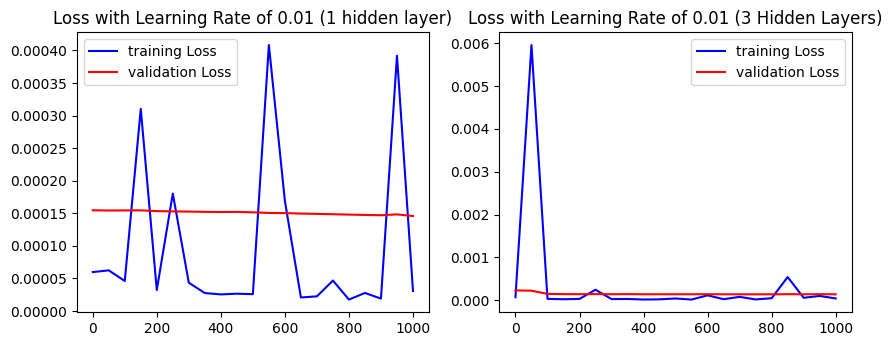

In [111]:
plt.figure(figsize=(10, 8))

plt.subplot(2,2,1)
plt.plot(epochs, train_loss_batch1, color='blue', label = 'training Loss')
plt.plot(epochs, val_loss_batch1, color='red', label = 'validation Loss')
plt.title('Loss with Learning Rate of 0.01 (1 hidden layer)')
plt.legend()

plt.subplot(2,2,2)
plt.plot(epochs, train_loss_batch2, color='blue', label = 'training Loss')
plt.plot(epochs, val_loss_batch2, color='red', label = 'validation Loss')
plt.title('Loss with Learning Rate of 0.01 (3 Hidden Layers)')
plt.legend()

plt.show()

In [105]:
train_loss_batch3, val_loss_batch3 = downsample_losses(train_loss_3000, val_loss_3000, step=50)
train_loss_batch4, val_loss_batch4 = downsample_losses(train_loss_2_3000, val_loss_2_3000, step=50)

In [103]:
epochs = range(0, 3001, 50)

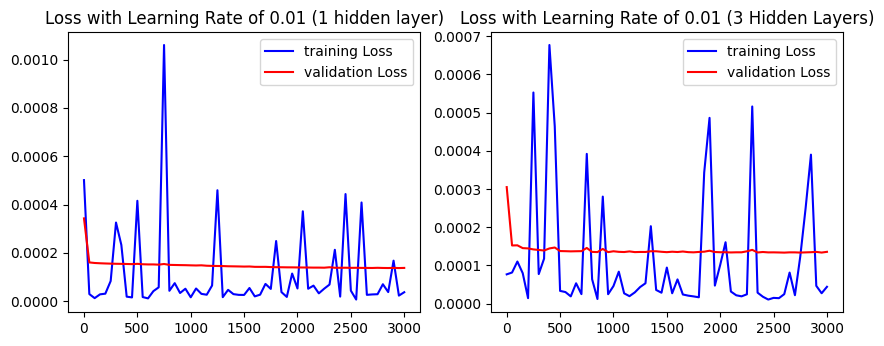

In [106]:
plt.figure(figsize=(10, 8))

plt.subplot(2,2,1)
plt.plot(epochs, train_loss_batch3, color='blue', label = 'training Loss')
plt.plot(epochs, val_loss_batch3, color='red', label = 'validation Loss')
plt.title('Loss with Learning Rate of 0.01 (1 hidden layer)')
plt.legend()

plt.subplot(2,2,2)
plt.plot(epochs, train_loss_batch4, color='blue', label = 'training Loss')
plt.plot(epochs, val_loss_batch4, color='red', label = 'validation Loss')
plt.title('Loss with Learning Rate of 0.01 (3 Hidden Layers)')
plt.legend()

plt.show()

In [8]:
import torch

# Specify the path to your saved .pth file
model_path = 'model1.pth'

# Load the entire model (including architecture and parameters)
model = torch.load(model_path)

# Ensure the model is in evaluation mode (if it's a trained model)
model.eval()

# Print the trainable parameters
for name, param in model.named_parameters():
    if param.requires_grad:
        print(name)

total_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print("Total number of trainable parameters ", total_params,  '\n')


0.weight
0.bias
2.weight
2.bias
Total number of trainable parameters  417 



In [9]:
import torch

# Specify the path to your saved .pth file
model_path = 'model2.pth'

# Load the entire model (including architecture and parameters)
model2 = torch.load(model_path)

# Ensure the model is in evaluation mode (if it's a trained model)
model2.eval()

# Print the trainable parameters
for name, param in model2.named_parameters():
    if param.requires_grad:
        print(name)

total_params = sum(p.numel() for p in model2.parameters() if p.requires_grad)
print("Total number of trainable parameters ", total_params,  '\n')


0.weight
0.bias
2.weight
2.bias
4.weight
4.bias
6.weight
6.bias
Total number of trainable parameters  3553 



In [10]:
import torch

# Specify the path to your saved .pth file
model_path = 'model1_3000.pth'

# Load the entire model (including architecture and parameters)
model1_3k = torch.load(model_path)

# Ensure the model is in evaluation mode (if it's a trained model)
model1_3k.eval()

# Print the trainable parameters
for name, param in model1_3k.named_parameters():
    if param.requires_grad:
        print(name)

total_params = sum(p.numel() for p in model1_3k.parameters() if p.requires_grad)
print("Total number of trainable parameters ", total_params,  '\n')


0.weight
0.bias
2.weight
2.bias
Total number of trainable parameters  417 



In [11]:
import torch

# Specify the path to your saved .pth file
model_path = 'model2_3000.pth'

# Load the entire model (including architecture and parameters)
model2_3k = torch.load(model_path)

# Ensure the model is in evaluation mode (if it's a trained model)
model2_3k.eval()

# Print the trainable parameters
for name, param in model2_3k.named_parameters():
    if param.requires_grad:
        print(name)

total_params = sum(p.numel() for p in model2_3k.parameters() if p.requires_grad)
print("Total number of trainable parameters ", total_params,  '\n')


0.weight
0.bias
2.weight
2.bias
4.weight
4.bias
6.weight
6.bias
Total number of trainable parameters  3553 

